In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from train_model import SimpleNN
from mfbox import gokunet


In [2]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [3]:
# load input data
x_test = np.loadtxt("/home/yang/Desktop/GitReps/GokuEmu/data/narrow/matter_power_297_Box25_Part75_27_Box100_Part300_z0/test_input.txt")
# normalize input data
bounds = np.loadtxt("/home/yang/Desktop/GitReps/GokuEmu/data/narrow/matter_power_297_Box25_Part75_27_Box100_Part300_z0/input_limits.txt")
# x_test = (x_test - bounds[:,0]) / (bounds[:,1] - bounds[:,0])

y_test = np.loadtxt("/home/yang/Desktop/GitReps/GokuEmu/data/narrow/matter_power_297_Box25_Part75_27_Box100_Part300_z0/test_output.txt")
y_test = 10**y_test


In [4]:
# load model
emu = gokunet(path_L1="models_vista/pre_N_L1_z0/best_model.pth",path_L2="models_vista/pre_N_L2_z0/best_model.pth",path_LH="models_vista/pre_N_LH_z0/best_model.pth")

In [5]:
x_test

array([[ 2.625000e-01,  4.516667e-02,  6.761111e-01,  2.255556e-09,
         9.513889e-01, -1.083333e+00,  4.166667e-02,  9.250000e-02,
         3.038889e+00,  1.166667e-02],
       [ 3.025000e-01,  5.083333e-02,  7.316667e-01,  1.944444e-09,
         9.819444e-01, -7.500000e-01, -7.083333e-01,  8.750000e-02,
         2.650000e+00,  8.333333e-03],
       [ 3.375000e-01,  4.750000e-02,  6.594444e-01,  2.033333e-09,
         9.986111e-01, -1.183333e+00, -1.250000e-01,  1.275000e-01,
         3.505556e+00, -2.166667e-02],
       [ 2.775000e-01,  4.983333e-02,  6.927778e-01,  2.388889e-09,
         9.958333e-01, -1.150000e+00, -2.083333e-01,  6.750000e-02,
         3.427778e+00, -1.666667e-03],
       [ 3.075000e-01,  4.850000e-02,  6.650000e-01,  2.166667e-09,
         9.541667e-01, -8.500000e-01, -7.916667e-01,  1.425000e-01,
         2.883333e+00,  2.500000e-02],
       [ 3.275000e-01,  4.616667e-02,  7.261111e-01,  1.722222e-09,
         9.736111e-01, -9.833333e-01,  3.750000e-01,  1.0

In [6]:
k, y_h_pred = emu.predict(x_test)
_, y_l1_pred = emu.predict_L1(x_test)
_, y_l2_pred = emu.predict_L2(x_test)

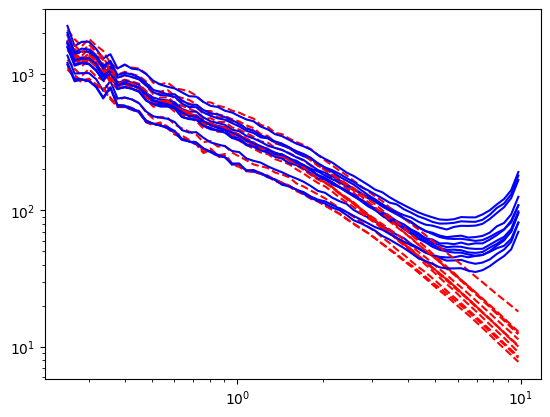

In [7]:
# Plot results
# plt.scatter(x, y, label="True Data")
# load k values

# plot in log-log scale
plt.figure()

# loop over all the test data
for i in range(y_h_pred.shape[0]):
    plt.loglog(k, y_test[i], color="red", linestyle="--", label="True Data") 
    # plt.loglog(k, y_h_pred[i], color="red", label="NN Prediction")
    plt.loglog(k, y_l1_pred[i], color="blue", label="NN L1 Prediction")
# plt.legend()
plt.show()

In [8]:
k.max()

np.float64(9.825361078106937)

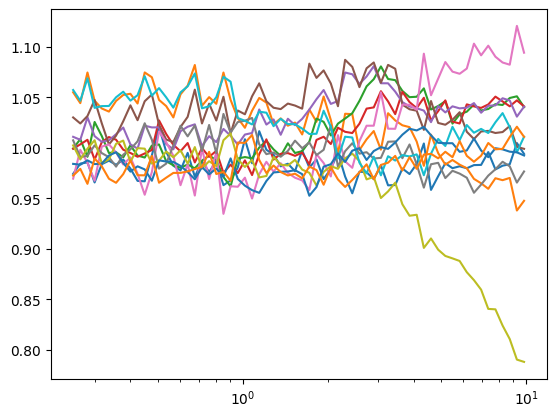

In [9]:
# plot ratio
plt.figure()

for i in range(y_h_pred.shape[0]):
    plt.semilogx(k, y_h_pred[i] / y_test[i])
# limit the y-axis
# plt.ylim(0.8, 1.2)
plt.show()

In [10]:
# calculate relative mean absolute error
rel_err = np.mean(np.abs(y_h_pred - y_test) / y_test)
print("Relative Mean Absolute Error:", rel_err)

Relative Mean Absolute Error: 0.02817577300515707


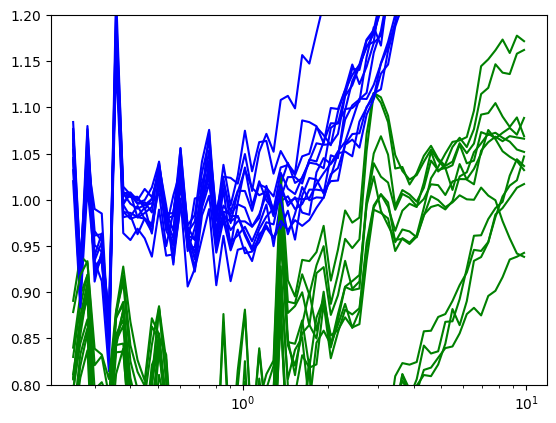

In [11]:
# plot ratio
plt.figure()

for i in range(y_h_pred.shape[0]):
    # plt.semilogx(k, y_h_pred[i] / y_test[i])
    plt.semilogx(k, y_l1_pred[i] / y_test[i], color="blue")
    plt.semilogx(k, y_l2_pred[i] / y_test[i], color="green")
# limit the y-axis
plt.ylim(0.8, 1.2)
plt.show()

In [12]:
# calculate mean square error (log scale)
mse = np.mean((np.log10(y_h_pred) - np.log10(y_test))**2)
print("Mean Square Error:", mse)

Mean Square Error: 0.0002869095902554481


In [13]:
# load HF training data
x_th = np.loadtxt("/home/yang/Desktop/GitReps/GokuEmu/data/narrow/matter_power_297_Box25_Part75_27_Box100_Part300_z0/train_input_fidelity_1.txt")
y_th = np.loadtxt("/home/yang/Desktop/GitReps/GokuEmu/data/narrow/matter_power_297_Box25_Part75_27_Box100_Part300_z0/train_output_fidelity_1.txt")
y_th = 10**y_th

In [14]:
# compare the prediction with the training data
k, y_th_pred = emu.predict(x_th)

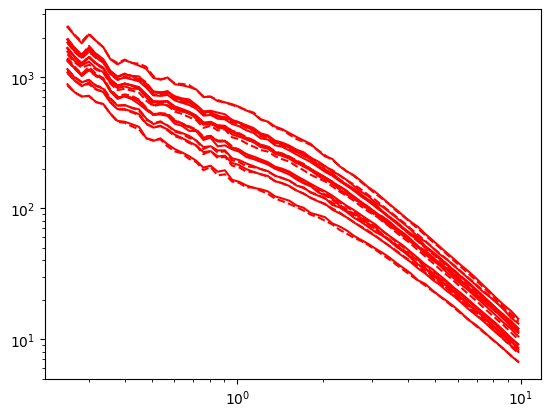

In [15]:


# plot in log-log scale
plt.figure()

# loop over all the test data 
for i in range(y_h_pred.shape[0]):
    plt.loglog(k, y_th[i], color="red", linestyle="--", label="True Data") 
    plt.loglog(k, y_th_pred[i], color="red", label="NN Prediction")
# plt.legend()
plt.show()


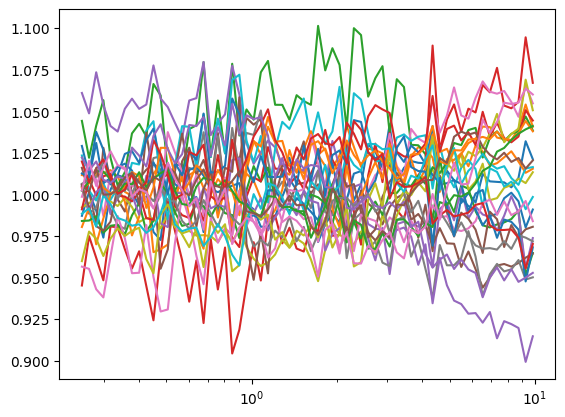

In [16]:
# plot ratio
plt.figure()

for i in range(y_th_pred.shape[0]):
    plt.semilogx(k, y_th_pred[i] / y_th[i])
# limit the y-axis
# plt.ylim(0.8, 1.2)
plt.show()

In [17]:
# calculate mean square error (log scale)
mse = np.mean((np.log10(y_th_pred) - np.log10(y_th))**2)
print("Mean Square Error:", mse)

Mean Square Error: 0.00014322021589895673
